In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
top10_df = pd.read_csv("Resources/cleaned_top10.csv")
big_df = pd.read_csv("Resources/bigdf_binary.csv")

In [2]:
top10_df

,acousticness,danceability,duration,energy,liveness,loudness,speechiness,tempo(BPM),valence,year,popularity
0,0.19,0.67,217000,0.89,0.08,-4,0.04,97,0.80,2010,83
1,0.24,0.75,263000,0.93,0.52,-5,0.23,87,0.64,2010,82
2,0.10,0.76,200000,0.84,0.29,-3,0.14,120,0.71,2010,80
3,0.00,0.70,295000,0.92,0.08,-4,0.04,119,0.71,2010,79
4,0.02,0.64,221000,0.84,0.09,-5,0.04,109,0.43,2010,78
...,...,...,...,...,...,...,...,...,...,...,...
598,0.01,0.61,176000,0.66,0.20,-7,0.03,104,0.16,2019,75
599,0.21,0.75,206000,0.79,0.07,-6,0.12,95,0.61,2019,75
600,0.07,0.53,260000,0.76,0.09,-5,0.34,136,0.65,2019,70
601,0.01,0.60,217000,0.79,0.42,-6,0.07,114,0.24,2019,69


In [3]:
big_df

,Unnamed: 0,Unnamed: 0.1,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo(BPM),valence,year
0,0,0,0.9950,0.708,158648,0.1950,0.563000,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,1,1,0.9940,0.379,282133,0.0135,0.901000,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,2,2,0.6040,0.749,104300,0.2200,0.000000,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,3,3,0.9950,0.781,180760,0.1300,0.887000,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,4,4,0.9900,0.210,687733,0.2040,0.908000,0.0980,-16.829,0,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,169904,169904,0.1730,0.875,163800,0.4430,0.000032,0.0891,-7.461,1,0.1430,100.012,0.3060,2020
169905,169905,169905,0.0167,0.719,167468,0.3850,0.031300,0.1110,-10.907,1,0.0403,128.000,0.2700,2020
169906,169906,169906,0.5380,0.514,180700,0.5390,0.002330,0.1080,-9.332,1,0.1050,123.700,0.1530,2020
169907,169907,169907,0.0714,0.646,167308,0.7610,0.000000,0.2220,-2.557,1,0.0385,129.916,0.4720,2020


In [4]:
# Drop from Big df
big_df = big_df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','instrumentalness'])
big_df

,acousticness,danceability,duration,energy,liveness,loudness,popularity,speechiness,tempo(BPM),valence,year
0,0.9950,0.708,158648,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0.0980,-16.829,0,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.0891,-7.461,1,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0.1110,-10.907,1,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0.1080,-9.332,1,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0.2220,-2.557,1,0.0385,129.916,0.4720,2020


In [5]:
# Drop Popularity
top10_df = top10_df.drop(columns = 'popularity')
top10_df

,acousticness,danceability,duration,energy,liveness,loudness,speechiness,tempo(BPM),valence,year
0,0.19,0.67,217000,0.89,0.08,-4,0.04,97,0.80,2010
1,0.24,0.75,263000,0.93,0.52,-5,0.23,87,0.64,2010
2,0.10,0.76,200000,0.84,0.29,-3,0.14,120,0.71,2010
3,0.00,0.70,295000,0.92,0.08,-4,0.04,119,0.71,2010
4,0.02,0.64,221000,0.84,0.09,-5,0.04,109,0.43,2010
...,...,...,...,...,...,...,...,...,...,...
598,0.01,0.61,176000,0.66,0.20,-7,0.03,104,0.16,2019
599,0.21,0.75,206000,0.79,0.07,-6,0.12,95,0.61,2019
600,0.07,0.53,260000,0.76,0.09,-5,0.34,136,0.65,2019
601,0.01,0.60,217000,0.79,0.42,-6,0.07,114,0.24,2019


In [6]:
# Split our preprocessed data into our features and target arrays
y = big_df['popularity']
X = big_df.drop(['popularity'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim= number_input_features, name = 'layer1')) 

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=18, activation="relu", name = 'layer2'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="tanh", name = 'layer3'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                220       
                                                                 
 layer2 (Dense)              (None, 18)                378       
                                                                 
 layer3 (Dense)              (None, 10)                190       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 799
Trainable params: 799
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Create a callback that saves the model's weights every 5 epochs
callback = tf.keras.callbacks.ModelCheckpoint(filepath = "Models/weights.{epoch:05d}.hdf5", save_freg = "epoch", period=5)

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
3983/3983 [==============================] - 4s 919us/step - loss: 0.3168 - accuracy: 0.8617
Epoch 2/100
3983/3983 [==============================] - 4s 905us/step - loss: 0.2976 - accuracy: 0.8715
Epoch 3/100
3983/3983 [==============================] - 4s 899us/step - loss: 0.2938 - accuracy: 0.8728
Epoch 4/100
3983/3983 [==============================] - 4s 891us/step - loss: 0.2921 - accuracy: 0.8735
Epoch 5/100
3983/3983 [==============================] - 4s 894us/step - loss: 0.2911 - accuracy: 0.8741
Epoch 6/100
3983/3983 [==============================] - 4s 902us/step - loss: 0.2905 - accuracy: 0.8739
Epoch 7/100
3983/3983 [==============================] - 4s 895us/step - loss: 0.2900 - accuracy: 0.8744
Epoch 8/100
3983/3983 [==============================] - 4s 904us/step - loss: 0.2896 - accuracy: 0.8743
Epoch 9/100
3983/3983 [==============================] - 4s 952us/step - loss: 0.2894 - accuracy: 0.8744
Epoch 10/100
3983/3983 [==============================]

3983/3983 [==============================] - 5s 1ms/step - loss: 0.2834 - accuracy: 0.8751
Epoch 80/100
3983/3983 [==============================] - 5s 1ms/step - loss: 0.2834 - accuracy: 0.8749
Epoch 81/100
3983/3983 [==============================] - 5s 1ms/step - loss: 0.2833 - accuracy: 0.8753
Epoch 82/100
3983/3983 [==============================] - 5s 1ms/step - loss: 0.2833 - accuracy: 0.8749
Epoch 83/100
3983/3983 [==============================] - 5s 1ms/step - loss: 0.2832 - accuracy: 0.8751
Epoch 84/100
3983/3983 [==============================] - 6s 1ms/step - loss: 0.2833 - accuracy: 0.8749
Epoch 85/100
3983/3983 [==============================] - 5s 1ms/step - loss: 0.2834 - accuracy: 0.8747
Epoch 86/100
3983/3983 [==============================] - 4s 1ms/step - loss: 0.2830 - accuracy: 0.8747
Epoch 87/100
3983/3983 [==============================] - 4s 1ms/step - loss: 0.2831 - accuracy: 0.8751
Epoch 88/100
3983/3983 [==============================] - 4s 1ms/step - loss:

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1328/1328 - 1s - loss: 0.2895 - accuracy: 0.8744 - 868ms/epoch - 654us/step
Loss: 0.2894820272922516, Accuracy: 0.8743820190429688


In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1328/1328 - 1s - loss: 0.2895 - accuracy: 0.8744 - 763ms/epoch - 575us/step
Loss: 0.2894820272922516, Accuracy: 0.8743820190429688


In [14]:
X_top = top10_df[['acousticness','danceability','duration','energy','liveness','loudness','speechiness','tempo(BPM)','valence','year']]
X_top

,acousticness,danceability,duration,energy,liveness,loudness,speechiness,tempo(BPM),valence,year
0,0.19,0.67,217000,0.89,0.08,-4,0.04,97,0.80,2010
1,0.24,0.75,263000,0.93,0.52,-5,0.23,87,0.64,2010
2,0.10,0.76,200000,0.84,0.29,-3,0.14,120,0.71,2010
3,0.00,0.70,295000,0.92,0.08,-4,0.04,119,0.71,2010
4,0.02,0.64,221000,0.84,0.09,-5,0.04,109,0.43,2010
...,...,...,...,...,...,...,...,...,...,...
598,0.01,0.61,176000,0.66,0.20,-7,0.03,104,0.16,2019
599,0.21,0.75,206000,0.79,0.07,-6,0.12,95,0.61,2019
600,0.07,0.53,260000,0.76,0.09,-5,0.34,136,0.65,2019
601,0.01,0.60,217000,0.79,0.42,-6,0.07,114,0.24,2019


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_top)

# Scale the data
X_top_scaled = X_scaler.transform(X_top)

In [16]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [17]:
# Save the model
filepath = './saved_model2'
save_model(nn, filepath)

INFO:tensorflow:Assets written to: ./saved_model2\assets


In [18]:
# Load the model
model = load_model(filepath, compile = True)

In [19]:
# Generate predictions for samples
predictions = model.predict(X_top_scaled)
print(predictions)

[[5.02049923e-04]
 [5.16682863e-04]
 [4.98205423e-04]
 [5.11765480e-04]
 [5.00649214e-04]
 [4.94956970e-04]
 [5.04702330e-04]
 [4.95612621e-04]
 [4.93854284e-04]
 [4.97460365e-04]
 [4.98414040e-04]
 [4.93735075e-04]
 [5.01960516e-04]
 [4.99129295e-04]
 [5.07086515e-04]
 [4.93854284e-04]
 [7.01695681e-04]
 [4.94718552e-04]
 [4.94331121e-04]
 [7.08371401e-04]
 [4.94629145e-04]
 [5.04970551e-04]
 [6.12497330e-04]
 [4.99010086e-04]
 [4.97192144e-04]
 [5.38408756e-04]
 [5.11884689e-04]
 [5.27232885e-04]
 [4.98682261e-04]
 [4.98563051e-04]
 [5.50448895e-04]
 [5.97655773e-04]
 [4.96953726e-04]
 [4.93675470e-04]
 [4.93884087e-04]
 [7.40051270e-04]
 [8.32498074e-04]
 [5.57094812e-04]
 [6.13629818e-04]
 [4.94331121e-04]
 [4.94211912e-04]
 [6.42120838e-04]
 [5.27411699e-04]
 [4.99725342e-04]
 [4.95076180e-04]
 [5.33431768e-04]
 [5.12987375e-04]
 [4.96327877e-04]
 [4.94360924e-04]
 [5.23656607e-04]
 [6.01112843e-04]
 [1.08376145e-03]
 [1.29136443e-03]
 [1.11639500e-03]
 [7.17759132e-04]
 [1.188963

In [20]:
top10_df["popularity_predict"] = predictions
top10_df

,acousticness,danceability,duration,energy,liveness,loudness,speechiness,tempo(BPM),valence,year,popularity_predict
0,0.19,0.67,217000,0.89,0.08,-4,0.04,97,0.80,2010,0.000502
1,0.24,0.75,263000,0.93,0.52,-5,0.23,87,0.64,2010,0.000517
2,0.10,0.76,200000,0.84,0.29,-3,0.14,120,0.71,2010,0.000498
3,0.00,0.70,295000,0.92,0.08,-4,0.04,119,0.71,2010,0.000512
4,0.02,0.64,221000,0.84,0.09,-5,0.04,109,0.43,2010,0.000501
...,...,...,...,...,...,...,...,...,...,...,...
598,0.01,0.61,176000,0.66,0.20,-7,0.03,104,0.16,2019,0.979498
599,0.21,0.75,206000,0.79,0.07,-6,0.12,95,0.61,2019,0.910206
600,0.07,0.53,260000,0.76,0.09,-5,0.34,136,0.65,2019,0.985186
601,0.01,0.60,217000,0.79,0.42,-6,0.07,114,0.24,2019,0.811933


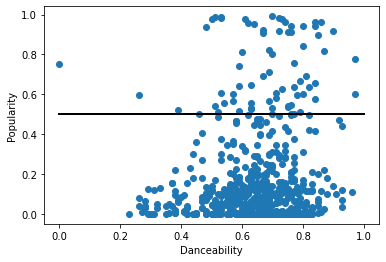

In [37]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['danceability']

plt.scatter(x_axis, y_axis)
plt.plot([0, 1], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

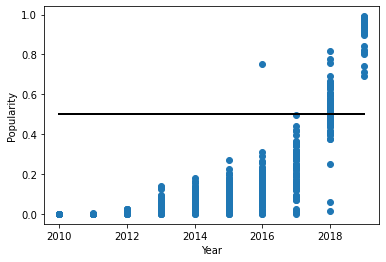

In [30]:
y_axis2 = top10_df['popularity_predict']
x_axis2 = top10_df['year']

plt.scatter(x_axis2, y_axis2)
plt.plot([2010,2019], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

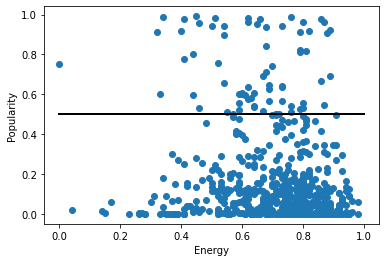

In [39]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['energy']

plt.scatter(x_axis, y_axis)
plt.plot([0, 1], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

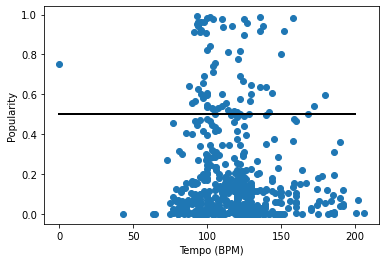

In [35]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['tempo(BPM)']

plt.scatter(x_axis, y_axis)
plt.plot([0, 200], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.show()

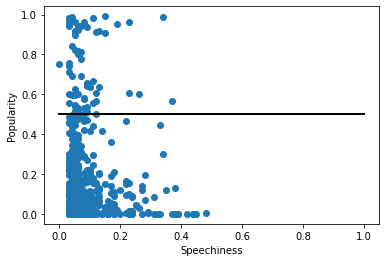

In [41]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['speechiness']

plt.scatter(x_axis, y_axis)
plt.plot([0, 1], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.show()

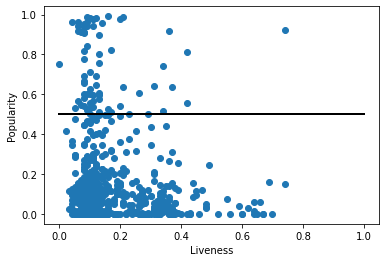

In [43]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['liveness']

plt.scatter(x_axis, y_axis)
plt.plot([0, 1], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.show()

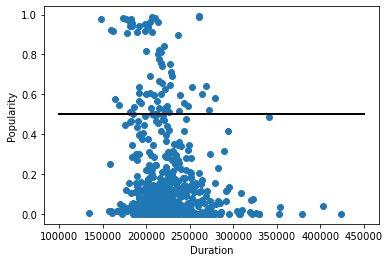

In [45]:
y_axis = top10_df['popularity_predict']
x_axis = top10_df['duration']

plt.scatter(x_axis, y_axis)
plt.plot([100000, 450000], [0.5, 0.5], 'k-', lw=2)
plt.xlabel("Duration")
plt.ylabel("Popularity")
plt.show()

In [46]:
column = top10_df['popularity_predict']
max_value = column.max()
max_value

0.9914751052856445

In [48]:
column = top10_df['popularity_predict']
max_index = column.idxmax()
print(top10_df.loc[[max_index]])

     acousticness  danceability  duration  energy  liveness  loudness  \
594          0.12           0.7    261000    0.45      0.16        -7   

     speechiness  tempo(BPM)  valence  year  popularity_predict  
594         0.15          93     0.14  2019            0.991475  
